### **Approach.**
**[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image associated with a label from 10 classes. The dataset serves as a direct drop-in replacement for the original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) for benchmarking machine learning algorithms. It shares the same image size and structure for training and testing splits.**

**In this IT3312 - AI Technologies Module's Individual Assignment, I will train a Convolutional Neural Network (CNN) classifier with 3 convolution layers using the Keras deep learning library. Initially, the model is trained for 10 epochs with a batch size of 256, using the categorical_crossentropy loss function and the Adam optimizer. Subsequently, I apply data augmentation, which generates new training samples by rotating, shifting, and zooming the original samples, and continue training the model for an additional 50 epochs.**

**I will begin by splitting the original training data (60,000 images) into 80% for training (48,000 images) and 20% for validation (12,000 images). The test data (10,000 images) will be kept separate to evaluate the model's accuracy on data it has never seen. This approach helps determine if the model is overfitting the training data. If the validation accuracy is higher than the training accuracy, it may indicate the need to lower the learning rate and train for more epochs. Conversely, if the training accuracy significantly exceeds the validation accuracy, it may be necessary to stop over-training.**

**Done By: Sandhya Palaniappan.**

In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('data/fashion-mnist_train.csv')
data_test = pd.read_csv('data/fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### **Processing Data.**
* **So, After loading and splitting the data, I preprocess it by reshaping it into the exact shape the network expects and scaling it so that all values are within the [0, 1] interval.**

* **Previously, for example, the training data was stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] range.** 

* **I transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.**

In [2]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

### **CNN with 3 Convolutional Layers.**
**This CNN takes as input tensors of shape (image_height, image_width, image_channels).** **So, in this case, I configure the CNN to process inputs of size (28, 28, 1), which matches the format of the FashionMNIST images. Therefore, I achieve this by passing the argument input_shape=(28, 28, 1) to the first layer.**

* **The first layer is a Conv2D layer that performs the convolution operation to extract features from the input images. This is done by sliding a convolution filter over the input to produce a feature map. Here, I choose a feature map size of 3 x 3.**
  
* **The second layer is a MaxPooling2D layer, which performs max-pooling to reduce the dimensionality of each feature. This helps to shorten training time and reduce the number of parameters. I use a pooling window size of 2 x 2.**
  
* **To combat overfitting, the third layer is a Dropout layer, a powerful regularization technique. Dropout reduces overfitting by forcing the model to learn multiple independent representations of the same data by randomly disabling neurons during the learning phase. In this model, dropout randomly disables 20% of the outputs.**
  
* **I repeat these steps to add more hidden layers: 2 Conv2D layers, 1 MaxPooling2D layer, and 2 Dropout layers.**
  
* **The next step is to feed the last output tensor into a stack of Dense layers, also known as fully connected layers. These densely connected classifiers process vectors, which are 1D, while the current output is a 3D tensor. Therefore, I need to flatten the 3D outputs to 1D, and then add 2 Dense layers on top.**

* **I include another Dropout layer between these 2 Dense layers to disable 30% of the outputs.**
  
* **Finally, I perform a 10-way classification (since there are 10 classes of fashion images) using a final layer with 10 outputs and a softmax activation. The softmax activation enables the model to calculate the output based on probabilities. Each class is assigned a probability, and the class with the highest probability is the model’s output for the given input.**

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

**When compiling the model, I choose categorical_crossentropy as the loss function, which is relevant for multiclass, single-label classification problems, and the Adam optimizer.**

* **The cross-entropy loss measures the error rate between the predicted value and the actual value.**

* **The formula for calculating cross-entropy loss is provided [here](https://en.wikipedia.org/wiki/Cross_entropy).**

* **Categorical is used because there are 10 classes to predict from. If there were only 2 classes, I would have used binary_crossentropy.**
  
* **The Adam optimizer is an improvement over SGD (Stochastic Gradient Descent). The optimizer updates the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and adjusts the weights accordingly. This process is how a neural network learns.**

In [4]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

**Let's examine how the dimensions of the feature maps change with each successive layer.**

In [5]:
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

* **There are 241,546 parameters available for training.**

* **The outputs of the Conv2D and MaxPooling2D layers are 3D tensors with the shape (height, width, channels).**

* **The number of channels is determined by the first argument passed to the Conv2D layer, which is 32.** 

* **The (3, 3, 128) outputs from the third Dropout layer are flattened into vectors of shape (1152,) before passing through two Dense layers.**

### **Training the Model.**
**As mentioned earlier, I train the model with a batch size of 256 for 10 epochs on both the training and validation data.**

In [6]:
history3 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 65s 1ms/step - loss: 0.8479 - acc: 0.6865 - val_loss: 0.5098 - val_acc: 0.8076
Epoch 2/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.5232 - acc: 0.8047 - val_loss: 0.4146 - val_acc: 0.8526
Epoch 3/10
48000/48000 [==============================] - 79s 2ms/step - loss: 0.4510 - acc: 0.8366 - val_loss: 0.3688 - val_acc: 0.8669
Epoch 4/10
48000/48000 [==============================] - 65s 1ms/step - loss: 0.4039 - acc: 0.8529 - val_loss: 0.3481 - val_acc: 0.8741
Epoch 5/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.3762 - acc: 0.8612 - val_loss: 0.3221 - val_acc: 0.8810
Epoch 6/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.3594 - acc: 0.8696 - val_loss: 0.3105 - val_acc: 0.8869
Epoch 7/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.3397 - acc: 0.8778 - val_loss: 0.2960 - val_acc

In [7]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.24964626643657684
Test accuracy: 0.9079


**My accuracy is 90.79%, which is quite impressive!**

### **Data Augmentation.**
**Overfitting can occur when there are too few samples to learn from, making it difficult to train a model that generalizes well to new data.** 

**If I had an infinite amount of data, my model would be exposed to every possible aspect of the data distribution, preventing overfitting.**

**Data augmentation addresses this by generating more training data from existing samples through a series of random transformations that produce realistic images. Therefore, the goal is for the model to never see the exact same image twice during training, helping it to generalize better.**

**In Keras, data augmentation is implemented by configuring various random transformations in the ImageDataGenerator instance:**
* ***rotation_range:* Specifies the range of degrees (0–180) within which to randomly rotate images.**
* ***width_shift* and *height_shift:* Define the range (as a fraction of total width or height) within which to randomly translate images vertically or horizontally.**
* ***shear_range:* Applies random shearing transformations.**
* ***zoom_range:* Performs random zooming into images.**

In [8]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

**Let's train the network with data augmentation.**

In [9]:
history3 = cnn3.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

Epoch 1/50
187/187 [==============================] - 66s 355ms/step - loss: 0.4831 - acc: 0.8195 - val_loss: 0.4110 - val_acc: 0.8404
Epoch 2/50
187/187 [==============================] - 71s 378ms/step - loss: 0.4413 - acc: 0.8350 - val_loss: 0.3684 - val_acc: 0.8633
Epoch 3/50
187/187 [==============================] - 78s 416ms/step - loss: 0.4205 - acc: 0.8437 - val_loss: 0.3511 - val_acc: 0.8684
Epoch 4/50
187/187 [==============================] - 69s 370ms/step - loss: 0.4098 - acc: 0.8478 - val_loss: 0.3550 - val_acc: 0.8614
Epoch 5/50
187/187 [==============================] - 65s 348ms/step - loss: 0.3997 - acc: 0.8510 - val_loss: 0.3362 - val_acc: 0.8744
Epoch 6/50
187/187 [==============================] - 67s 361ms/step - loss: 0.3943 - acc: 0.8524 - val_loss: 0.3537 - val_acc: 0.8675
Epoch 7/50
187/187 [==============================] - 71s 377ms/step - loss: 0.3892 - acc: 0.8560 - val_loss: 0.3249 - val_acc: 0.8750
Epoch 8/50
187/187 [==============================] - 7

In [10]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.22910109297037123
Test accuracy: 0.9117


**Great news, I have improved the accuracy to 91.17%!**

### **Results.**
**Let's plot the training and validation accuracy, along with the training and validation loss.**

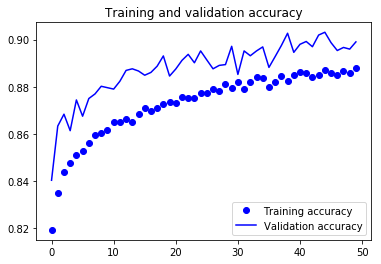

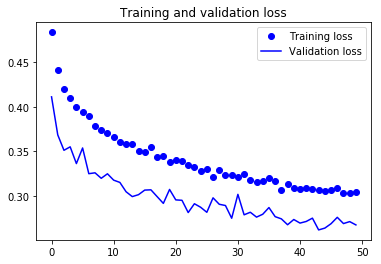

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history3.history['acc']
val_accuracy = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**These plots look good: the training curves closely follow the validation curves.**

### **Classification Report:**
**Here is a summary of my classifier's performance.**

In [12]:
# get the predictions for the test data
predicted_classes = cnn3.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [13]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.85      0.86      0.86      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.92      0.83      0.87      1000
    Class 3       0.93      0.94      0.93      1000
    Class 4       0.88      0.83      0.85      1000
    Class 5       0.98      0.98      0.98      1000
    Class 6       0.68      0.78      0.73      1000
    Class 7       0.95      0.96      0.96      1000
    Class 8       0.99      0.99      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.91      0.91      0.91     10000



**It's apparent that the classifier is underperforming for class 6 in both precision and recall.** 

**For class 0, the classifier slightly lacks precision, while for classes 2 and 4, it slightly lacks recall.**

**I might gain more insight by visualizing the correct and incorrect predictions.**

**Here is a subset of correctly predicted classes.**

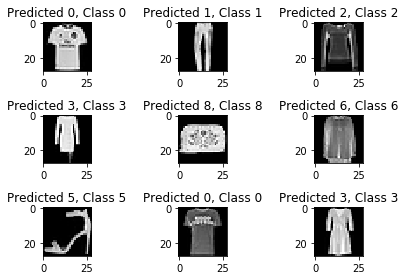

In [14]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

And here is a subset of incorrectly predicted classes:

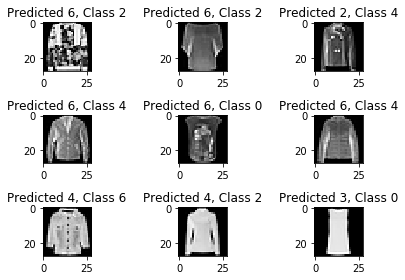

In [15]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

### **Visualizing What My Model Learns.**
**Deep-learning models are often described as "black boxes" because they learn representations that are difficult to extract and present in a human-readable form. While this is somewhat true for certain types of deep-learning models, it does not apply to convnets. The representations learned by convnets are highly amenable to visualization, primarily because they represent visual concepts.**

**Here, I attempt to visualize the intermediate outputs of a CNN (intermediate activations). Visualizing intermediate activations involves displaying the feature maps output by various convolutional and pooling layers in the network for a given input. The output of a layer, often called its activation (the result of the activation function), shows how an input is decomposed by the different filters learned by the network.**

**I want to visualize feature maps with three dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the appropriate way to visualize these feature maps is by independently plotting the contents of each channel as a 2D image.**

**I begin by selecting an input test image (#1994).**

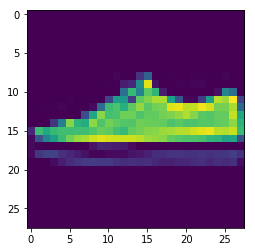

In [16]:
test_im = X_train[1994]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

**So, to extract the specific feature maps I'm interested in, I create a Keras model that takes batches of images as input and outputs the activations of all convolutional and pooling layers.** 

**I use the Keras Model class to achieve this.** 

**A model is created using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors).** 

**The resulting instance is a Keras model that maps the specified inputs to the specified outputs.** 

**When given an image input, this model returns the activation values of the layers in the original model.**

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


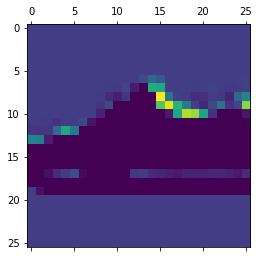

In [17]:
from keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in cnn3.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(input=cnn3.input, output=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im.reshape(1,28,28,1))

# activation of the 1st convolution layer
first_layer_activation = activations[0]

# display the 3rd channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

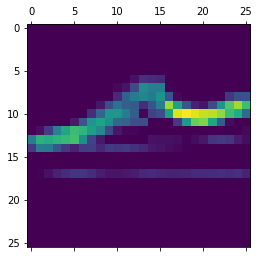

In [18]:
# display the 6th channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

**Let's create a complete visualization of all the activations in the network.** 

**I will extract and plot every channel in each of the eight activation maps, then stack the results into one large image tensor with the channels arranged side by side.**

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


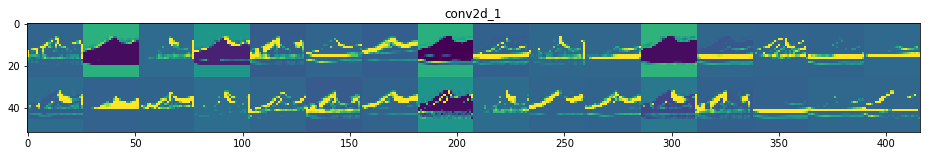

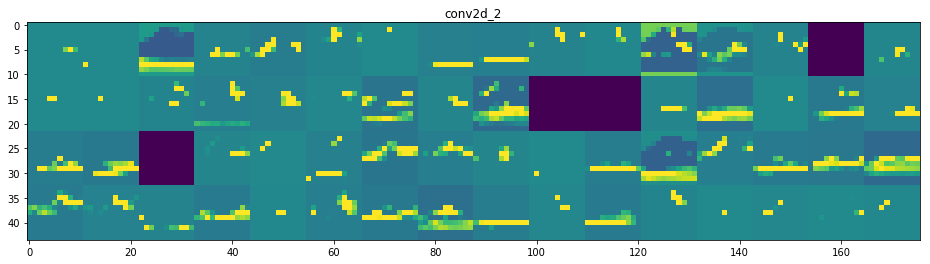

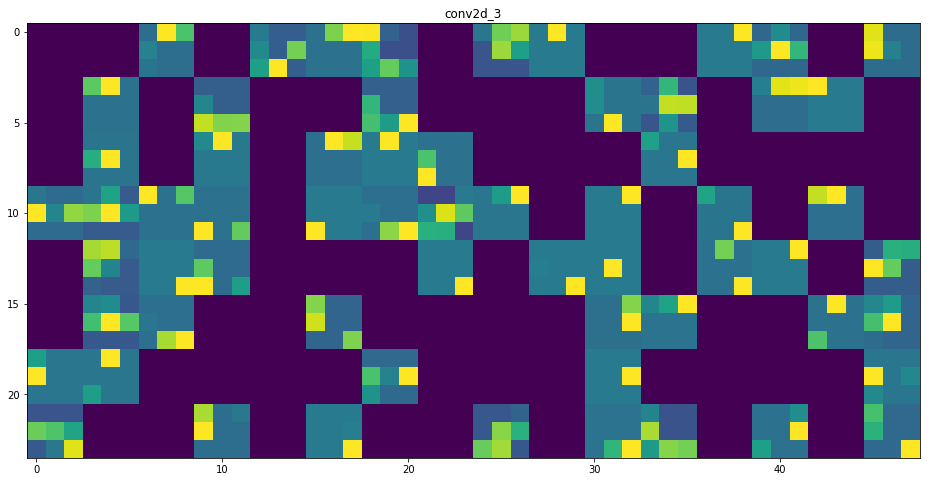

In [19]:
layer_names = []
for layer in cnn3.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

### **Conclusion.**

**In this individual assignment, I developed a CNN with three convolutional layers to classify images from the Fashion-MNIST dataset. The model was initially trained for 10 epochs, achieving a test accuracy of 90.79%. After applying data augmentation and continuing training for an additional 50 epochs, the accuracy improved to 91.17%. This demonstrates the effectiveness of the three-layer architecture and the benefits of data augmentation in improving model performance.**

**Future work could focus on experimenting with different layer configurations, optimizers, and learning rates to further enhance performance. This individual assignment highlighted the value of intermediate complexity in CNN architectures for achieving high classification accuracy while maintaining computational efficiency.**